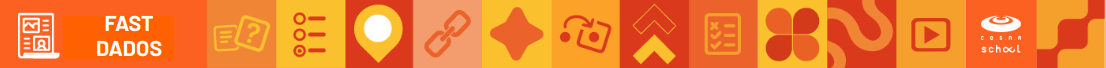

# Desafio 01 - Trilha #3

**Prof. Luigi Luz**

Contato: *lfml@cesar.org.br*

--------------------------------

Nome do aluno: Luiz Carlos Gomes

Data: 23/10/2023

## Descrição do desafio

Desenvolva um programa em Python que consome de duas fontes de dados diferentes (um site da internet e uma API pública), agrega os dados coletados (caso necessário) e apresenta os dados agregados num formato à sua escolha (dataframe, dicionário, etc..).

Observações:

- A API é de livre escolha;
- O site é de livre escolha;
- A operação de transformação é de livre escolha, mas caso seja utilizada, deve ser capaz de relacionar os dados obtidos das duas fontes de dados utilizadas.

Sugestão de passo a passo para desenvolvimento

- 1) Defina as fontes de dados que serão utilizadas;
- 2) Defina o tipo de transformação que será feita com os dados coletados;
- 3) Execute a coleta de dados a partir da API escolhida, ainda sem agregar;
- 4) Execute a coleta de dados a partir do site escolhido, ainda sem agregar;
- 5) Agregue os dados coletados da API e do site escolhido;
- 6) Apresente os dados agregados num formato de dados à sua escolha (dataframe, dicionário, etc..)

### Algumas APIs públicas

- Exchange Rates Data API: API que fornece informações de criptomoedas;
- OpenWeatherMap: API que fornece informações climáticas de diversas cidades do mundo;
- NASA API: API que fornece informações sobre a NASA em geral;
- GitHub API: API que fornece informações sobre repositórios do GitHub;
- Spotify API: API que fornece informações de músicas, playlists e artistas que estão disponíveis no Spotify;
- PokeAPI: API que fornece informações sobre personagens, habilidades, jogos e itens do universo Pokémon
- AwesomeAPI: fornece dados de cotações de moedas;

### Alguns sites possíveis de fazer web scrapping

- Toscrape: Site para praticar scraping de dados. Possui informações sobre livros e também frases famosas
- Yahoo! Finance: Possui informações relacionadas ao mundo financeiro, preço de ações, etc
- Wikipedia: Informações em geral
- Mercado Livre: E-commerce de diferentes itens

## Import de bibliotecas

In [ ]:
# Realizar a operacao de import das bibliotecas necessarias! =)

# import da biblioteca pandas, utilizada para manipular dataframes (formato de tabela do python)
import pandas as pd
# import da biblioteca numpy, utilizada para cálculos vetoriais e matriciais
import numpy as np
# import da biblioteca time, utilizada para dar pausas de tempo, entre outras operações relacionada a controle de temporização
import time
# import da biblioteca requests, utilizada para fazer requisições
import requests
# importar a biblioteca BeautifulSoup
from bs4 import BeautifulSoup
# biblioteca que pega documentos html a partir de paginas web
from urllib.request import urlopen

# adicione algum outro import caso seja necessário

## Coleta de dados da API

- Nome da API escolhida:  (AwesomeAPI)

- Dado/os a coletados obtidos a partir da api: (insira aqui o/os a serem coletados a partir da api)

### Algumas dicas

Lembre que para fazer requisições do tipo get em APIs, é utilizada a função "requests.get(url_desejado)"

A função requests.get() retorna um item que possui as informações sobre o que foi requisitado

Para acessar o conteúdo do request em formato, basta utilizar a função "res.json()" e selecionar os dados que você deseja utilizar

### Referências

-  https://www.digitalocean.com/community/tutorials/how-to-get-started-with-the-requests-library-in-python-pt
-  https://12ft.io/proxy?q=https%3A%2F%2Fwww.covildodev.com.br%2Fartigo%2Frequests-python
-  https://acervolima.com/tutorial-de-solicitacoes-do-python/

In [ ]:
# Documentação da API:
# https://docs.awesomeapi.com.br/api-de-moedas

In [ ]:
# quero descobrir qual foi a última cotação entre Real e Euro
res_cotacao = requests.get("https://economia.awesomeapi.com.br/last/EUR-BRL")

In [ ]:
res_cotacao.status_code

200

In [ ]:
# visualizar o conteudo no formato json
cotacao_dicionario = res_cotacao.json()
cotacao_dicionario

{'EURBRL': {'code': 'EUR',
  'codein': 'BRL',
  'name': 'Euro/Real Brasileiro',
  'high': '5.2868',
  'low': '5.2343',
  'varBid': '-0.0231',
  'pctChange': '-0.44',
  'bid': '5.2433',
  'ask': '5.2513',
  'timestamp': '1699653586',
  'create_date': '2023-11-10 18:59:46'}}

In [ ]:
cotacao_dicionario['EURBRL']['high']

'5.2868'

In [ ]:
# retornar o valor de fechamento nos ultimos 20 dias

qtde_dias = 20
res_fechamento_qtde_dias = requests.get(f"https://economia.awesomeapi.com.br/json/daily/EUR-BRL/{qtde_dias}")
res_fechamento_qtde_dias

<Response [200]>

In [ ]:
fechamento_hoje = res_fechamento_qtde_dias.json()[19]
fechamento_hoje

{'high': '5.3613',
 'low': '5.3613',
 'varBid': '0',
 'pctChange': '0',
 'bid': '5.3363',
 'ask': '5.3863',
 'timestamp': '1698019117'}

## Coleta de dados com Web Scrapping

- Nome do site escolhido: (Wikipedia)

- Dado/os a serem coletados por web scraping: (Recordes ainda ativos de Ayrton Senna)

### Algumas dicas

Para fazer a coleta com a biblioteca beautifulSoup, pode ser utilizado como exemplo:

```
# devolve o site como um arquivo html
html = urlopen('http://www.pythonscraping.com/pages/page1.html')
# le o arquivo html de uma forma "bonita"
bs = BeautifulSoup(html.read(), 'html.parser')
# printa apenas o conteudo do primeiro header
print(bs.h1)
```
Caso queira utilizar a função do pandas para pegar tabelas, basta utilizar o seguinte código como exemplo:

```
# documentação da função pd.read_html
# https://pandas.pydata.org/docs/reference/api/pandas.read_html.html
# podemos usar o argumento "match" para buscar pelo nome da tabela em especifico
br_list = pd.read_html(url, match="insira-o-nome-da-tabela")
# ele devolve pra gente uma lista de tabelas, pra poder acessar, precisamos especificar o indice
```

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://pt.wikipedia.org/wiki/Ayrton_Senna"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encontrar a seção de "Recordes Ainda Ativos"
    secao_recordes = soup.find('span', {'id': 'Recordes_Ainda_Ativos'})

    # Encontrar a tabela de recordes
    tabela_recordes = secao_recordes.find_next('table')

    # Extrair os registros
    registros = []
    for linha in tabela_recordes.find_all('tr')[1:]:  # Ignora a primeira linha que contém os cabeçalhos
        colunas = linha.find_all('td')
        if len(colunas) == 3:
            recorde = colunas[0].text.strip()
            descricao = colunas[1].text.strip()
            registros.append(f"{recorde}: {descricao}")

    # Imprimir os registros
    for rec in registros:
        print(rec)
else:
    print(f"Erro ao acessar a página. Código de status: {response.status_code}")


Melhor Porcentagem de Pole Position (Corridas Disputadas/Pole Position): 40,3%
Maior número de Pole-positions consecutivas num mesmo GP: 7
Maior número de Pole-positions num mesmo GP: 8
Maior número de poles em sequência: 8
2º Maior número de poles em sequência: 7
Primeiras filas consecutivas (1ª ou 2ª posição na largada): 24
Melhor Porcentagem de Primeiras filas consecutivas num mesmo ano: 100%
Vitórias de ponta a ponta (GPs em que completou todas as voltas no primeiro lugar): 19
Mais Vitórias no GP de Mônaco: 6
Mais Vitórias consecutivas num mesmo GP: 5


- Mitchell, R. (2019). **Web Scraping com Python: Coletando mais dados da web moderna.** Novatec Editora.